## import libraries and load datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings = pd.read_csv('ratings.csv', nrows=10000)  
movies = pd.read_csv('movies.csv')

# Use Data Types with Less Memory
ratings['userId'] = ratings['userId'].astype('int32')
ratings['movieId'] = ratings['movieId'].astype('int32')
ratings['rating'] = ratings['rating'].astype('float32')

print(ratings.head())
print(movies.head())


   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


##  Understand the Structure of the Data

In [4]:
# dataset shapes
print(f'Ratings shape: {ratings.shape}')
print(f'Movies shape: {movies.shape}')


Ratings shape: (10000, 4)
Movies shape: (87585, 3)


In [7]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10000 non-null  int32  
 1   movieId    10000 non-null  int32  
 2   rating     10000 non-null  float32
 3   timestamp  10000 non-null  int64  
dtypes: float32(1), int32(2), int64(1)
memory usage: 195.4 KB
None


In [6]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None


## Basic Descriptive Analysi

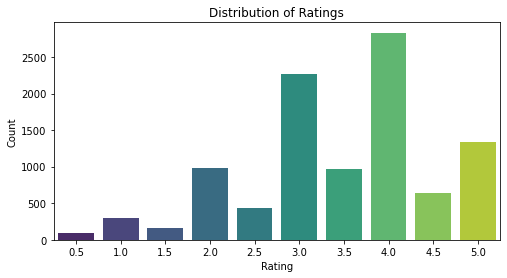

In [8]:
# Distribution of ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


## Find out which movies have the most ratings.

In [9]:
most_rated = ratings.groupby('movieId').size().reset_index(name='count')
most_rated = most_rated.sort_values(by='count', ascending=False).head(10)

# Merge with movies to get titles
top_movies = most_rated.merge(movies, on='movieId')
print(top_movies[['title', 'count']])

                                               title  count
0                   Shawshank Redemption, The (1994)     34
1                                Pulp Fiction (1994)     33
2                   Silence of the Lambs, The (1991)     30
3                                Forrest Gump (1994)     30
4  Lord of the Rings: The Fellowship of the Ring,...     26
5          Star Wars: Episode IV - A New Hope (1977)     26
6          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)     24
7                               Fugitive, The (1993)     24
8  Raiders of the Lost Ark (Indiana Jones and the...     24
9                                 Matrix, The (1999)     23


## Average Rating per Movie

In [33]:
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
average_ratings = average_ratings.merge(movies, on='movieId')
average_ratings = average_ratings.sort_values(by='rating', ascending=False).head(10)

print(average_ratings[['title', 'rating']])


                              title  rating
2165                 Cherish (2002)     5.0
2882        Little Manhattan (2005)     5.0
2676          Last Shot, The (2004)     5.0
3462  Art of Getting By, The (2011)     5.0
878        Perfect Murder, A (1998)     5.0
881               Hav Plenty (1997)     5.0
3758      Hell or High Water (2016)     5.0
2706         Ladies Man, The (1961)     5.0
2711                  Batman (1966)     5.0
2713                Hi, Mom! (1970)     5.0


##  Genre Analysis

In [35]:
# count the number of movies for each genre
genres = movies['genres'].str.get_dummies(sep='|')
genre_counts = genres.sum().sort_values(ascending=False)
genre_counts

Drama                 34175
Comedy                23124
Thriller              11823
Romance               10369
Action                 9668
Documentary            9363
Horror                 8654
(no genres listed)     7080
Crime                  6976
Adventure              5402
Sci-Fi                 4907
Animation              4617
Children               4520
Mystery                4013
Fantasy                3851
War                    2325
Western                1696
Musical                1059
Film-Noir               353
IMAX                    195
dtype: int64

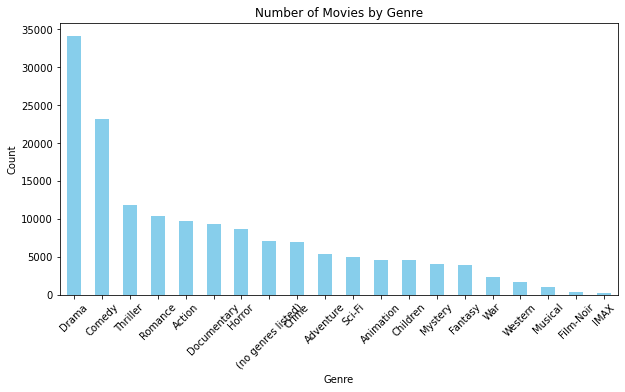

In [36]:
# Plot genre distribution
plt.figure(figsize=(10, 5))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [39]:
genre_average_ratings = ratings.merge(movies[['movieId', 'genres']], on='movieId')
genre_average_ratings = genre_average_ratings[genre_average_ratings['genres'] != '(no genres listed)']


genre_dummies = genre_average_ratings['genres'].str.get_dummies(sep='|')

# Add the dummy variables to the ratings data
genre_average_ratings = genre_average_ratings.join(genre_dummies)
genre_average_ratings.head()


,userId,movieId,rating,timestamp,genres,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,17,4.0,944249077,Drama|Romance,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3,17,5.0,1084485217,Drama|Romance,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,15,17,4.5,1289858271,Drama|Romance,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,28,17,4.0,961513829,Drama|Romance,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,29,17,4.0,845056111,Drama|Romance,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


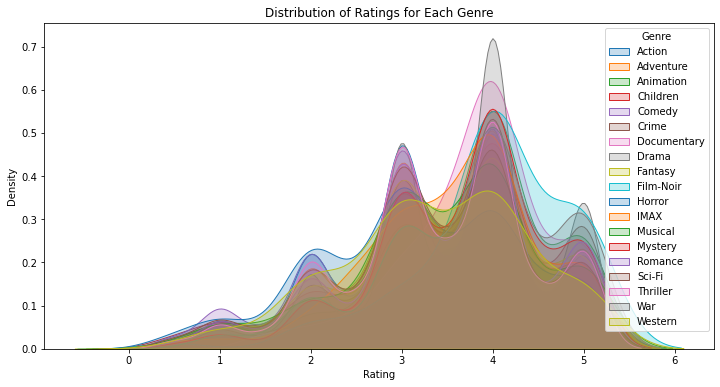

In [38]:
# Plot the distribution of ratings for each genre
plt.figure(figsize=(12, 6))
for genre in genre_dummies.columns:
    sns.kdeplot(genre_average_ratings[genre_average_ratings[genre] == 1]['rating'], label=genre, fill=True)


plt.title('Distribution of Ratings for Each Genre')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend(title='Genre')
plt.show()

## distribution of ratings for each genre separately

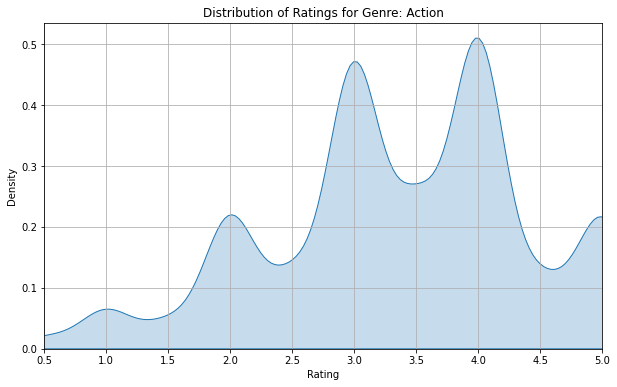

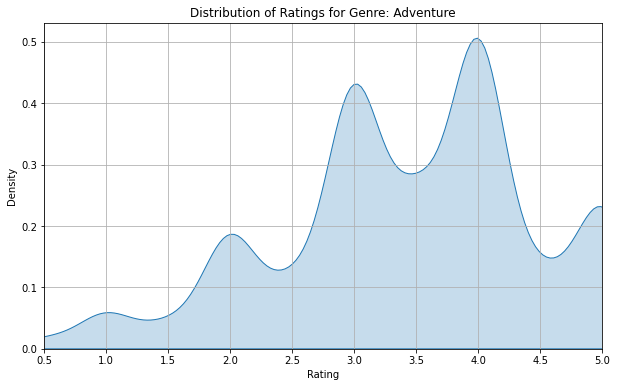

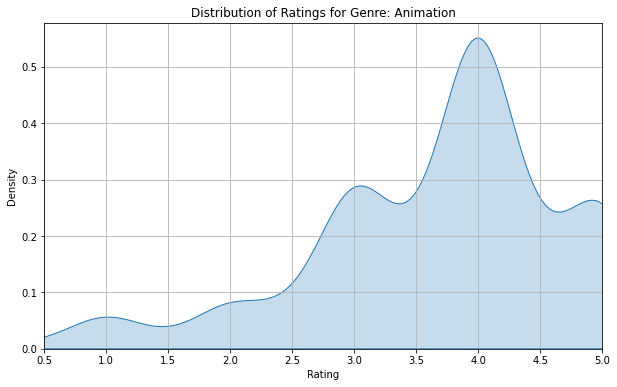

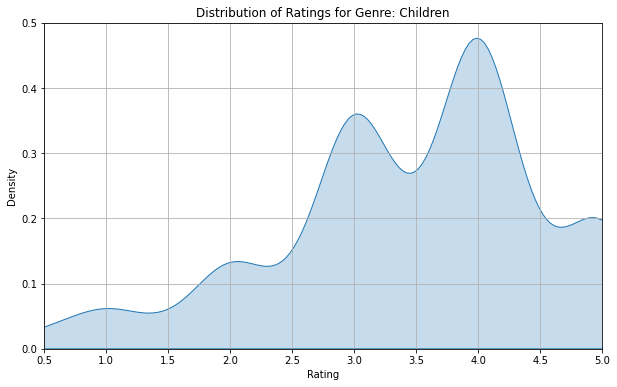

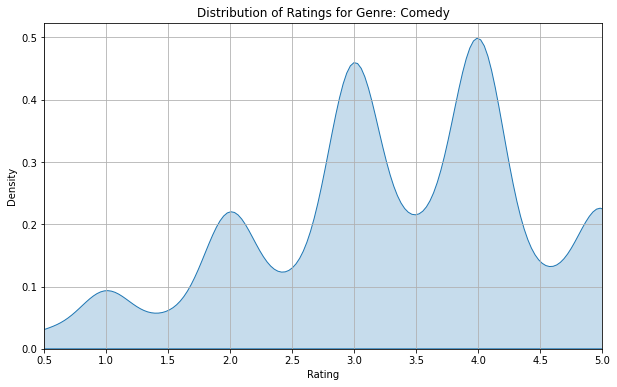

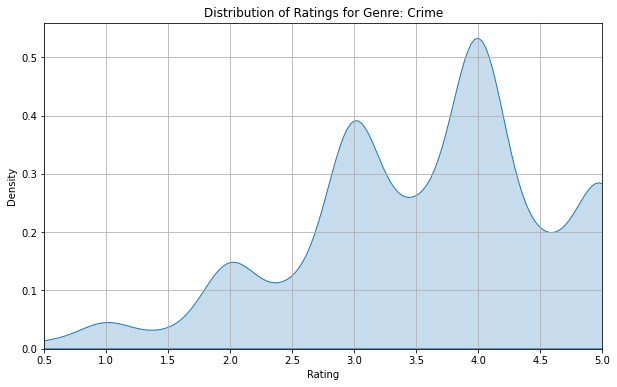

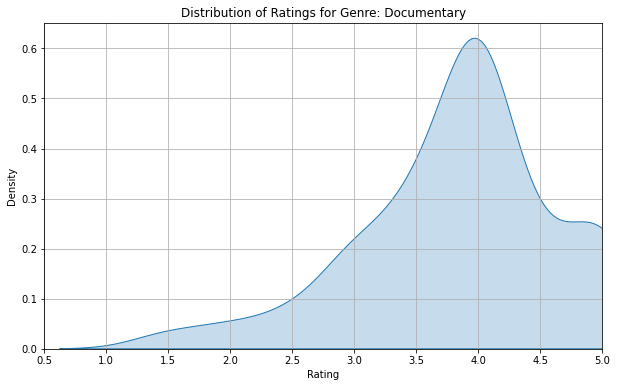

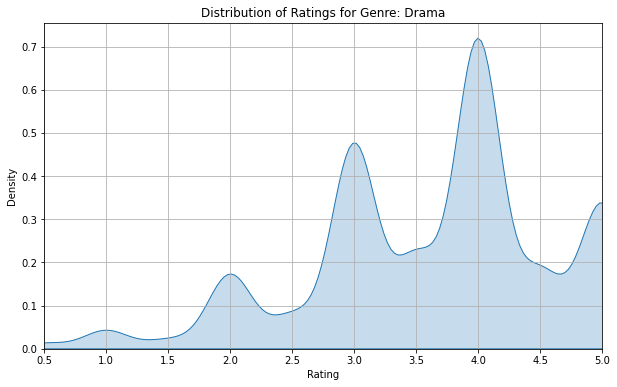

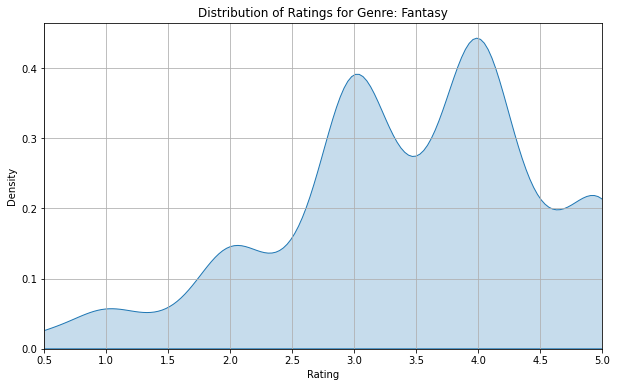

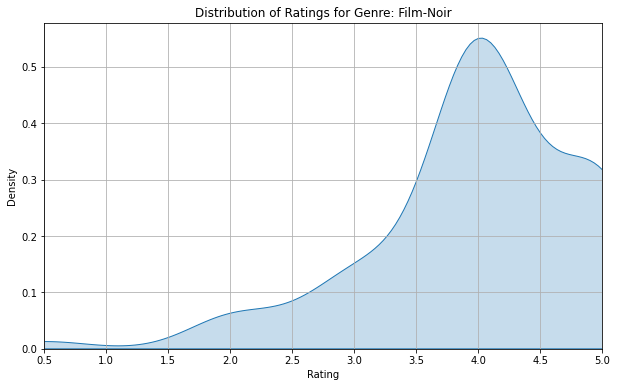

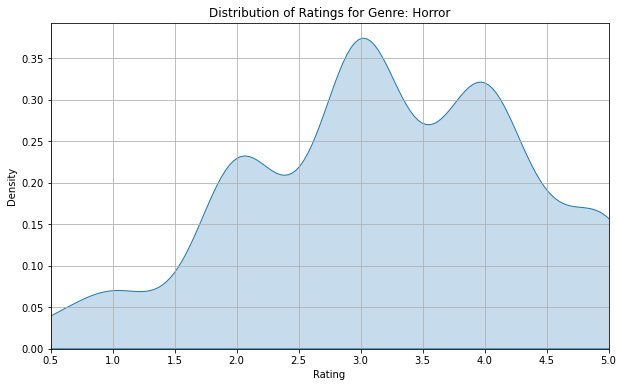

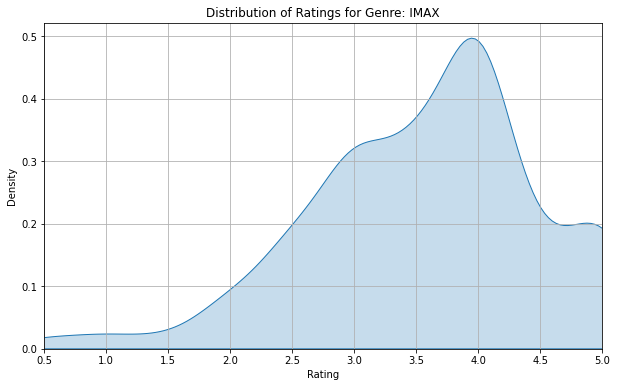

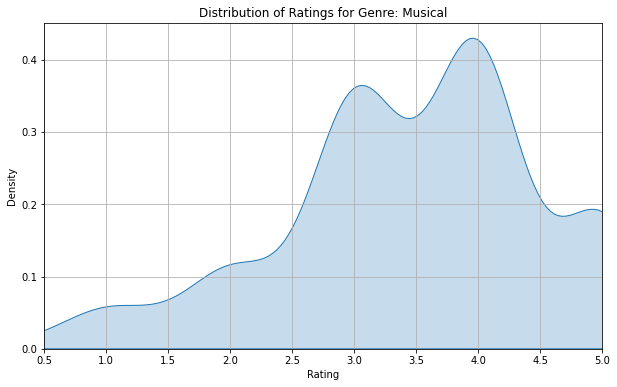

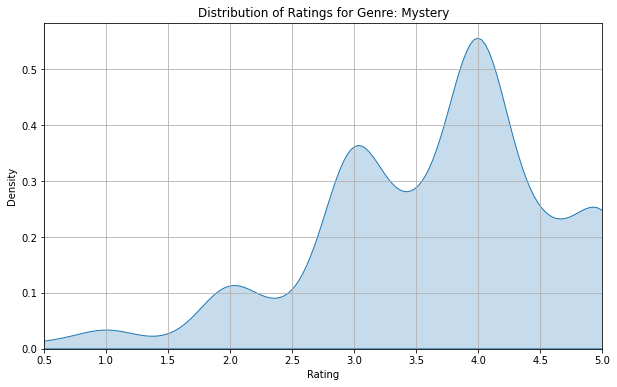

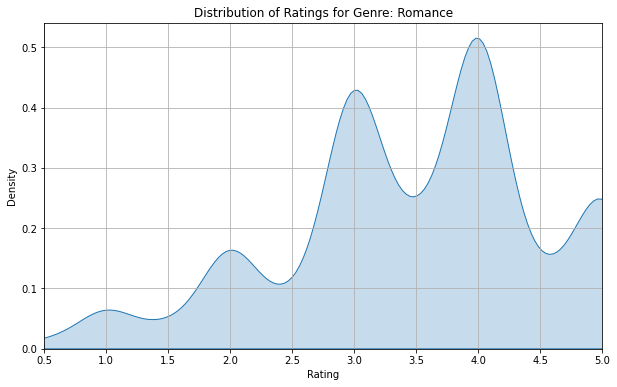

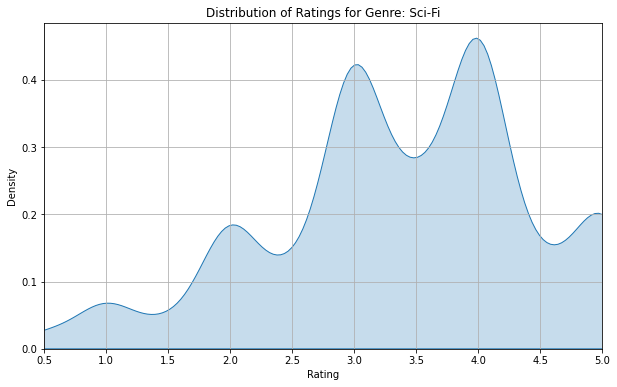

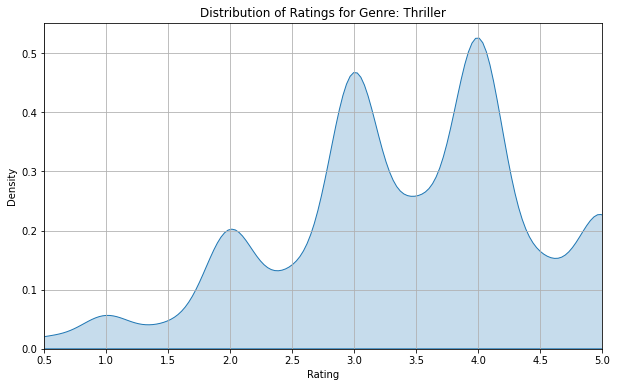

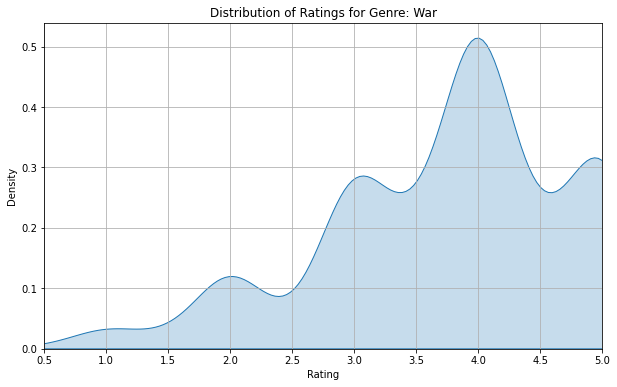

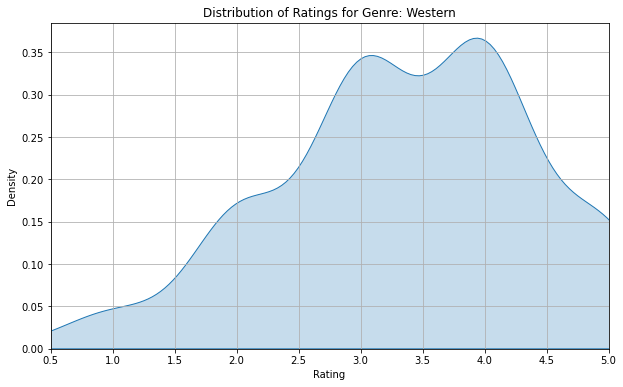

In [40]:
# Plot the distribution of ratings for each genre separately
for genre in genre_dummies.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(genre_average_ratings[genre_average_ratings[genre] == 1]['rating'], fill=True)
    plt.title(f'Distribution of Ratings for Genre: {genre}')
    plt.xlabel('Rating')
    plt.ylabel('Density')
    plt.xlim(0.5, 5)  # Set x-axis limits for ratings
    plt.grid()
    plt.show()


## User Analysis

In [41]:
most_active_users = ratings['userId'].value_counts().head(10)
print(most_active_users)

userId
28    2842
10     660
65     552
35     503
59     417
16     295
33     265
64     243
37     235
62     178
Name: count, dtype: int64


## Calculate the average rating given by each user

In [42]:
user_average_ratings = ratings.groupby('userId')['rating'].mean().reset_index()
user_average_ratings = user_average_ratings.sort_values(by='rating', ascending=False).head(10)

print(user_average_ratings)

    userId    rating
13      14  4.982759
52      53  4.762500
25      26  4.469697
22      23  4.452381
7        8  4.322581
1        2  4.269231
32      33  4.266038
8        9  4.241379
49      50  4.220339
18      19  4.212766
